## 3.1 例題: 個体ごとに平均種子数が異なる場合
>架空植物100個体を調査して得られた,個体ごとの種子数のデータがあるとしましょう.\
>これを統計モデルを使ってどのように表現すればよいか,というのがこの章でとりくむ問題です.

変数名
* 植物個体のID: $i$
* 種子数: $y_i$
* 体サイズ: $x_i$
* 全個体のうち50個体($i \in \{1, 2, ..., 50 \}$)は何も処理をしていない($C$:コントロール)
* 残り50個体($i \in \{51, 52, ..., 100 \}$)には肥料を加える($T$:施肥処理)

### ライブラリのインポート

In [1]:
# ライブラリをインポートする
import polars as pl
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

from scipy.stats import poisson

## 3.2 観測されたデータの概要を調べる
```.parquet```拡張子に変換したファイルを読み込む.

In [2]:
# データを読み込む
d = pl.read_parquet("../data/ch 03/data3a.parquet")

In [3]:
# データをディスプレイに表示する
d

y,x,f
i64,f64,str
6,8.31,"""C"""
6,9.44,"""C"""
6,9.5,"""C"""
12,9.07,"""C"""
10,10.16,"""C"""
…,…,…
8,9.15,"""T"""
6,8.52,"""T"""
8,10.24,"""T"""


列ごとにデータを表示する.

In [4]:
d["x"].to_numpy()

array([ 8.31,  9.44,  9.5 ,  9.07, 10.16,  8.32, 10.61, 10.06,  9.93,
       10.43, 10.36, 10.15, 10.92,  8.85,  9.42, 11.11,  8.02, 11.93,
        8.55,  7.19,  9.83, 10.79,  8.89, 10.09, 11.63, 10.21,  9.45,
       10.44,  9.44, 10.48,  9.43, 10.32, 10.33,  8.5 ,  9.41,  8.96,
        9.67, 10.26, 10.36, 11.8 , 10.94, 10.25,  8.74, 10.46,  9.37,
        9.74,  8.95,  8.74, 11.32,  9.25, 10.14,  9.05,  9.89,  8.76,
       12.04,  9.91,  9.84, 11.87, 10.16,  9.34, 10.17, 10.99,  9.19,
       10.67, 10.96, 10.55,  9.69, 10.91,  9.6 , 12.37, 10.54, 11.3 ,
       12.4 , 10.18,  9.53, 10.24, 11.76,  9.52, 10.4 ,  9.96, 10.3 ,
       11.54,  9.42, 11.28,  9.73, 10.78, 10.21, 10.51, 10.73,  8.85,
       11.2 ,  9.86, 11.54, 10.03, 11.88,  9.15,  8.52, 10.24, 10.86,
        9.97])

In [5]:
d["y"].to_numpy()

array([ 6,  6,  6, 12, 10,  4,  9,  9,  9, 11,  6, 10,  6, 10, 11,  8,  3,
        8,  5,  5,  4, 11,  5, 10,  6,  6,  7,  9,  3, 10,  2,  9, 10,  5,
       11, 10,  4,  8,  9, 12,  8,  9,  8,  6,  6, 10, 10,  9, 12,  6, 14,
        6,  7,  9,  6,  7,  9, 13,  9, 13,  7,  8, 10,  7, 12,  6, 15,  3,
        4,  6, 10,  8,  8,  7,  5,  6,  8,  9,  9,  6,  7, 10,  6, 11, 11,
       11,  5,  6,  4,  5,  6,  5,  8,  5,  9,  8,  6,  8,  7,  9],
      dtype=int64)

In [6]:
d["f"].to_numpy()

array(['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'T', 'T',
       'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T',
       'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T',
       'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T',
       'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T'], dtype=object)

In [7]:
# データ型を確認する
print(d["y"].dtype)
print(d["x"].dtype)
print(d["f"].dtype)

Int64
Float64
String


In [8]:
# データの概要を確認する
d.describe()

statistic,y,x,f
str,f64,f64,str
"""count""",100.0,100.0,"""100"""
"""null_count""",0.0,0.0,"""0"""
"""mean""",7.83,10.0891,null
"""std""",2.624881,1.008049,null
"""min""",2.0,7.19,"""C"""
"""25%""",6.0,9.43,null
"""50%""",8.0,10.16,null
"""75%""",10.0,10.67,null
"""max""",15.0,12.4,"""T"""


## 3.3 統計モデリングの前にデータを図示する

Text(0.5, 1.0, '図3.2 例題の架空データの図示')

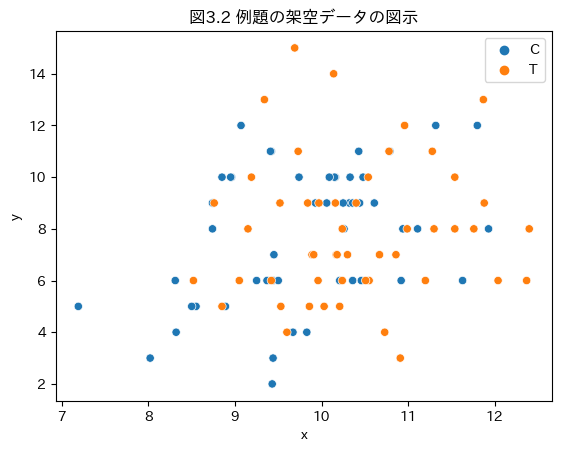

In [9]:
# 体サイズxと種子数yの散布図
sns.scatterplot(data = d.to_pandas(), x = "x", y = "y", hue = "f")
plt.legend(loc = "best")
plt.title("図3.2 例題の架空データの図示")

Text(0.5, 1.0, '図3.3 植物の種子数の分布を,施肥処理fiでグループ分けした箱ひげ図')

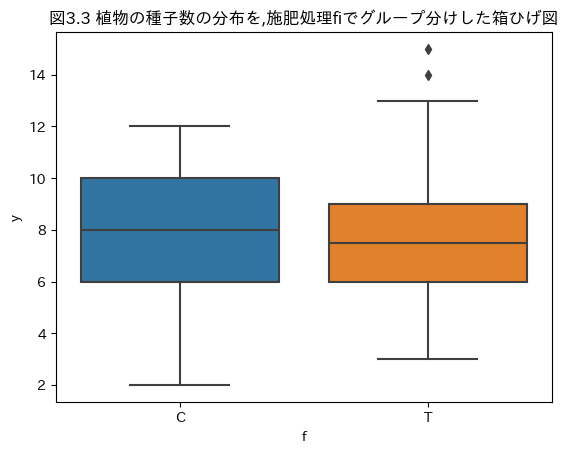

In [10]:
# 施肥処理fと種子数yの箱ひげ図
sns.boxplot(data = d.to_pandas(), x = "f", y = "y")
plt.title("図3.3 植物の種子数の分布を,施肥処理fiでグループ分けした箱ひげ図")

## 3.4 ポアソン回帰の統計モデル
ポアソン分布
* $p(y | \lambda) =  \frac{\lambda ^ y exp(- \lambda)}{y !}$

### 3.4.1 線形予測子と対数リンク関数
* $\lambda =  \exp ( \beta _1 + \beta _2 x_i )$: 個体$i$の平均種子数$\lambda _i$
* $\log \lambda =  \beta _1 + \beta _2 x_i$: (リンク関数) $=$ (線形予測子)

### 3.4.2 あてはめとあてはまりの良さ

In [11]:
# GLMの当てはめを行う
import statsmodels.formula.api as smf
import statsmodels.api as sm

model = smf.glm("y ~ x", d, family = sm.families.Poisson()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Thu, 28 Mar 2024   Deviance:                       84.993
Time:                        21:17:42   Pearson chi2:                     83.8
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04414
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.125      0.034       0.006       0.145
==============================================================================
"""

結果出力より,
* $\hat{\beta}_1 = 1.29$
* $\hat{\beta}_2 = 0.0757$

であることがわかった.

In [12]:
# このモデルの最大対数尤度を得る
model.llf

-235.38625076986077

In [13]:
print(model.params)
print(model.params.iloc[0])
print(model.params.iloc[1])

Intercept    1.291721
x            0.075662
dtype: float64
1.291720838642378
0.07566191454072188


### 3.4.3 ポアソン回帰モデルによる予測

Text(0.5, 1.0, '図3.7 平均種子数λの予測')

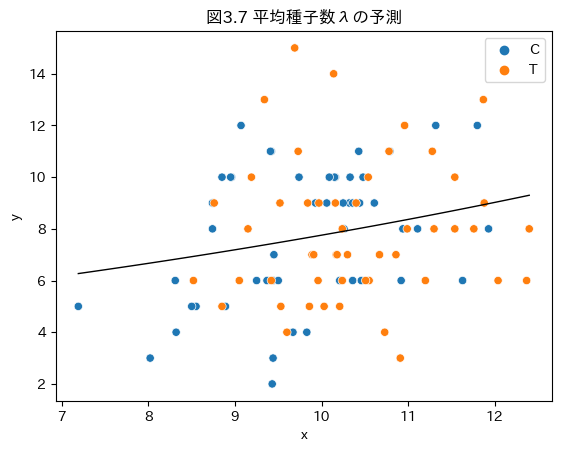

In [14]:
# モデルの当てはまりをグラフで確認する
sns.scatterplot(data = d.to_pandas(), x = "x", y = "y", hue = "f")

xx = np.linspace(d["x"].min(), d["x"].max(), 100)
plt.plot(xx, np.exp(model.params.iloc[0] + model.params.iloc[1] * xx),
         color = "black", linewidth = 1)

plt.legend(loc = "best")
plt.title("図3.7 平均種子数λの予測")

Text(0.5, 1.0, '図3.7 平均種子数λの予測')

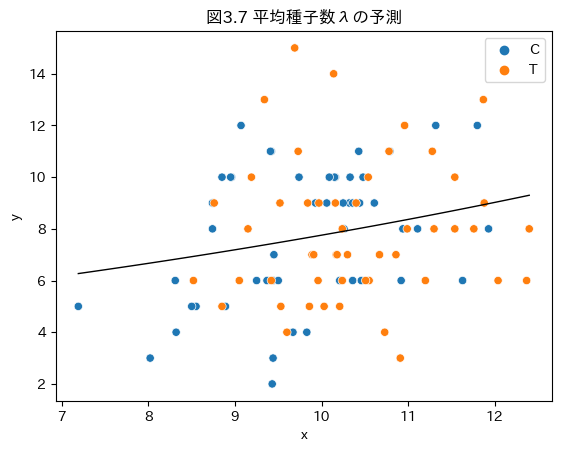

In [15]:
# モデルの当てはまりをグラフで確認する(predict関数を使用する)
sns.scatterplot(data = d.to_pandas(), x = "x", y = "y", hue = "f")

xx = pl.DataFrame({"x": np.linspace(d["x"].min(), d["x"].max(), 100)})
plt.plot(xx, model.predict(xx),
         color = "black", linewidth = 1)

plt.legend(loc = "best")
plt.title("図3.7 平均種子数λの予測")

## 3.5 説明変数が因子型の統計モデル

In [16]:
#カテゴリ変数を使う場合は,Pandas.DataFrameに変換する
model2 = smf.glm("y ~ f", d.to_pandas(), family = sm.families.Poisson()).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -237.63
Date:                Thu, 28 Mar 2024   Deviance:                       89.475
Time:                        21:17:43   Pearson chi2:                     87.1
No. Iterations:                     4   Pseudo R-squ. (CS):          0.0003192
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0516      0.051     40.463      0.000       1.952       2.151
f[T.T]         0.0128      0.071      0.179      0.858      -0.127       0.153
==============================================================================
"""

In [17]:
# 対数尤度
model2.llf

-237.62725696068682

## 3.6 説明変数が数量型 + 因子型の統計モデル

In [18]:
#カテゴリ変数を使う場合は,Pandas.DataFrameに変換する
model3 = smf.glm("y ~ x + f", d.to_pandas(), family = sm.families.Poisson()).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.29
Date:                Thu, 28 Mar 2024   Deviance:                       84.808
Time:                        21:17:43   Pearson chi2:                     83.8
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04590
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2631      0.370      3.417      0.001       0.539       1.988
f[T.T]        -0.0320      0.074     -0.430      0.667      -0.178       0.114
x              0.0801      0.037      2.162      0.031       0.007       0.153
==============================================================================
"""

In [19]:
# 対数尤度
model3.llf

-235.2937192424937

### 3.6.1 対数リンク関数の分かりやすさ

## 3.7 「何でも正規分布」「何でも直線」には無理がある

## 3.8 この章のまとめと参考文献
* 一般化線形モデル(GLM)はポアソン回帰やロジスティック回帰(第6章)など,いくつかの制約を満たしている統計モデルたちの総称である.
* Rを使うとデータを要約したいろいろな統計量を調べられる.
* 統計モデルを作るためにはでーたを図示することがとても大切である.
* GLMは確率分布・リンク関数・線形予測子を指定する統計モデルであり,Rのlgm()関数でパラメーターを推定できる.
* 統計モデルの因子型の説明変数は,ダミー変数という考え方で(とりあえず)理解できる.
* GLMでは数量型・因子型の両タイプの説明変数を同時に読み込んでよく,またそのときに対数リンク関数を使っていると説明変数の効果が,それぞれの積として表現できるので理解しやすい.
* GLMの設計では,データをうまく表現できる確率分布を選ぶという発想なので,「何でも正規分布といった考え方から脱却できる.

* Dobson & Barnett「一般化線形モデル入門」「An introduction to generalized linear models」
* Crawley 「統計学:Rを用いた入門書」
* Venables & Ripley 「Modern applied statistics with S」
* Faraway 「Extending the linear model with R」

In [20]:
%load_ext watermark
%watermark --iversions

numpy              : 1.26.4
japanize_matplotlib: 1.1.3
seaborn            : 0.12.2
matplotlib         : 3.8.0
polars             : 0.20.16
statsmodels        : 0.14.0

